# Tugas Praktikum 6

Nama : Rizal Adiyanto Nugroho

NIM : 24060122140156

Lab C1

## IRIS DATASET

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal length', 'sepal width', 'petal length', 'petal width', 'target'])

Import dataset

In [ ]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
X = df.loc[:, features].values
y = df.loc[:, ['target']].values
X = StandardScaler().fit_transform(X)

Memisahkan fitur dan target dataset, fitur akan disimpan pada variabel X dan target disimpan dalam variabel Y, serta melakukan standarisasi menggunakan StandardScaler

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDF = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])


Kode ini menggunakan metode Principal Component Analysis (PCA) untuk mereduksi dimensi dataset X menjadi dua dimensi utama. Dengan menggunakan PCA(n_components=2), proses reduksi diatur untuk menghasilkan dua komponen utama (principal components). Dataset X kemudian diubah ke dalam ruang dua dimensi ini menggunakan fit_transform(X), menghasilkan array bernama principalComponents yang berisi representasi data dalam dua dimensi. Hasil ini dikonversi menjadi sebuah DataFrame Pandas dengan kolom yang dinamai 'principal component 1' dan 'principal component 2', lalu disimpan dalam variabel principalDF.

In [ ]:
finalDF = pd.concat([principalDF, df[['target']]], axis=1)

menggabungkan DataFrame hasil PCA (principalDF) dengan kolom target asli dari dataset menggunakan pd.concat().

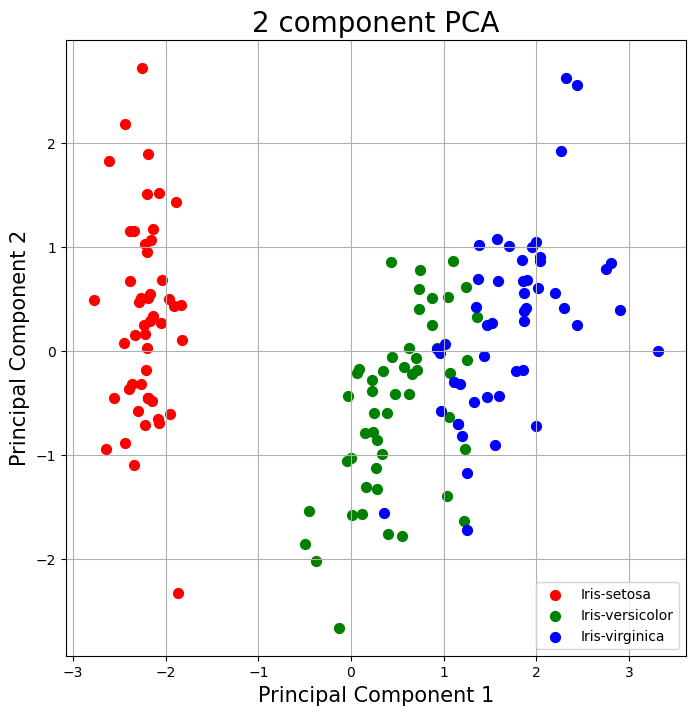

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 component PCA', fontsize=20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
  indicesToKeep = finalDF['target'] == target
  ax.scatter(finalDF.loc[indicesToKeep, 'principal component 1'],
      finalDF.loc[indicesToKeep, 'principal component 2'],
      c=color, s=50)
ax.legend(targets)
ax.grid()

Kode ini digunakan untuk memvisualisasikan hasil reduksi dimensi menggunakan PCA pada dataset yang telah ditambahkan informasi target. Grafik scatter plot dibuat menggunakan Matplotlib untuk menggambarkan data dalam ruang dua dimensi berdasarkan dua komponen utama PCA. Plot ini memiliki sumbu x dan y yang diberi label 'Principal Component 1' dan 'Principal Component 2', serta judul '2 component PCA'. Target dalam dataset, yaitu 'Iris-setosa', 'Iris-versicolor', dan 'Iris-virginica', masing-masing diberi warna berbeda (merah, hijau, biru). Data untuk setiap target dipilih menggunakan kondisi logis, dan titik-titik scatter ditampilkan dengan ukuran s=50. Legenda ditambahkan untuk menjelaskan warna tiap target, dan grid diaktifkan untuk memperjelas pembacaan grafik. Visualisasi ini membantu memahami distribusi data berdasarkan dua komponen utama PCA dan bagaimana setiap target dikelompokkan dalam ruang dua dimensi.

In [ ]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

## CARS DATASET

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
filename = 'cars_clus.csv'
data = pd.read_csv(filename, names=['manufact', 'model', 'sales', 'resale', 'type', 'price', 'engine_s',
                                   'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg'])

In [3]:
features = ['sales', 'resale', 'price', 'engine_s', 'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap']
x = data.loc[:, features].values
x = pd.DataFrame(x, columns=features).apply(pd.to_numeric, errors='coerce').dropna().values
x = StandardScaler().fit_transform(x)

In [4]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])

In [5]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(principalDf)
principalDf['Cluster'] = kmeans.labels_

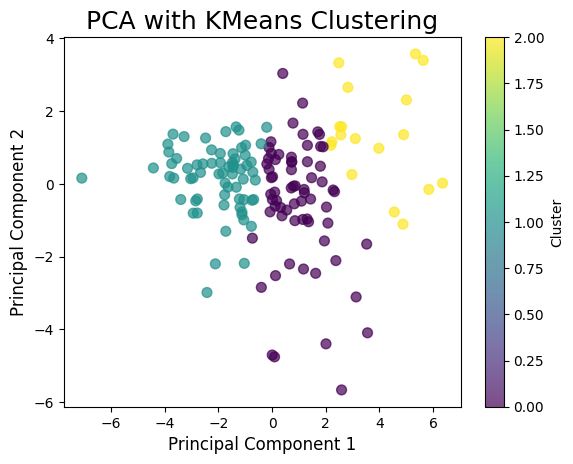

In [7]:
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'],
            c=principalDf['Cluster'], cmap='viridis', s=50, alpha=0.7)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.title('PCA with KMeans Clustering', fontsize=18)
plt.colorbar(label='Cluster')
plt.show()

Gambar diatas menunjukkan hasil analisis clustering dengan KMeans setelah data direduksi menggunakan PCA. setiap titik mewakili sebuah kendaraan, yang posisinya ditentukan oleh dua komponen utama PCA (principal component 1 pada sumbu x dan principal component 2 pada sumbu y). Warna titik-titik pada grafik menunjukkan hasil pengelompokan KMeans ke dalam tiga cluster, Cluster ini merepresentasikan kelompok kendaraan dengan karakteristik yang mirip berdasarkan fitur-fitur seperti harga, tenaga mesin, kapasitas bahan bakar, dan lainnya.

In [8]:
print(pca.explained_variance_ratio_)

[0.52758327 0.21452615]


Hasil output diatas menunjukkan proporsi variansi data asli yang dapat dijelaskan oleh masing-masing komponen utama dalam PCA. Dari nilai yang diberikan [0.52758327, 0.21452615], komponen utama pertama (principal component 1) menjelaskan sekitar 52,76% dari variansi total data, sementara komponen utama kedua (principal component 2) menjelaskan sekitar 21,45% variansi. Secara total, kedua komponen ini menjelaskan sekitar 74,21% dari variansi data asli. Artinya, dengan hanya menggunakan dua dimensi ini, sebagian besar informasi atau pola penting dalam data dapat direpresentasikan, sehingga membuat analisis lebih sederhana tanpa kehilangan banyak informasi penting.

In [9]:
components = pd.DataFrame(pca.components_, columns=features, index=['PC1', 'PC2'])
print(components)

        sales    resale     price  engine_s  horsepow  wheelbas     width  \
PC1  0.217396  0.240168  0.304119  0.331088  0.357974  0.318855  0.409326   
PC2  0.299342 -0.513875 -0.400933  0.304517  0.064908  0.212079 -0.001722   

       length  curb_wgt  fuel_cap  
PC1  0.392513 -0.375716 -0.018957  
PC2  0.057043  0.058793  0.580470  


Hasil yang ditampilkan adalah matriks komponen utama dari PCA, yang menunjukkan kontribusi atau bobot dari setiap fitur asli terhadap dua komponen utama (PC1 dan PC2). Setiap nilai dalam matriks ini merepresentasikan korelasi linear antara fitur asli dan komponen utama. Misalnya, pada PC1, fitur yang memiliki bobot besar seperti curb_wgt (0.392513) dan width (0.409326) menunjukkan bahwa fitur ini memberikan kontribusi signifikan terhadap pembentukan komponen utama pertama. Di sisi lain, pada PC2, fitur seperti resale (-0.513875) dan fuel_cap (0.580470) memberikan kontribusi besar terhadap komponen utama kedua.